# Twitter Sentiment Analysis
____

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Sagar Charma\AppData\Local\Temp\ipykernel_12744\555797462.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
import nltk
#ltk.download('stopwords')

In [3]:
df = pd.read_csv('training.1600000.processed.noemoticon.csv', encoding='ISO-8859-1') 

In [4]:
df.shape

(1599999, 6)

In [5]:
df.head()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [6]:
column_name = ['target','id','data', 'flag','user', 'text']
df = pd.read_csv('training.1600000.processed.noemoticon.csv', names=column_name, encoding='ISO-8859-1')

In [7]:
df = df.head(5000)

Checking null value

In [8]:
df.isnull().sum()

target    0
id        0
data      0
flag      0
user      0
text      0
dtype: int64

In [9]:
df['target'].value_counts()

target
0    5000
Name: count, dtype: int64

In [10]:
df.replace({'target': {4:1}}, inplace=True)

In [11]:
df['target'].value_counts()

target
0    5000
Name: count, dtype: int64

In [12]:
df['text'] = df['text'].apply(lambda x: x.lower())

In [13]:
df['text']

0       @switchfoot http://twitpic.com/2y1zl - awww, t...
1       is upset that he can't update his facebook by ...
2       @kenichan i dived many times for the ball. man...
3         my whole body feels itchy and like its on fire 
4       @nationwideclass no, it's not behaving at all....
                              ...                        
4995                                      long day today 
4996                       a friend broke his promises.. 
4997                 @gjarnling i am fine thanks - tired 
4998            trying to keep my eyes open..damn baking 
4999                          why the hell is it snowing 
Name: text, Length: 5000, dtype: object

In [14]:
df.head()

,target,id,data,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@kenichan i dived many times for the ball. man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


# NLTK

lets take random text and perform nltk

In [15]:
texts = df['text'][45]
texts

"@viennah yay! i'm happy for you with your job! but that also means less time for me and you... "

lets make a token

In [16]:
tokens = nltk.word_tokenize(texts)
tokens

['@',
 'viennah',
 'yay',
 '!',
 'i',
 "'m",
 'happy',
 'for',
 'you',
 'with',
 'your',
 'job',
 '!',
 'but',
 'that',
 'also',
 'means',
 'less',
 'time',
 'for',
 'me',
 'and',
 'you',
 '...']

let check the tags <br/>
For more info check [Here](https://www.guru99.com/pos-tagging-chunking-nltk.html)

In [17]:
tagged = nltk.pos_tag(tokens)
tagged

[('@', 'JJ'),
 ('viennah', 'NN'),
 ('yay', 'NN'),
 ('!', '.'),
 ('i', 'NN'),
 ("'m", 'VBP'),
 ('happy', 'JJ'),
 ('for', 'IN'),
 ('you', 'PRP'),
 ('with', 'IN'),
 ('your', 'PRP$'),
 ('job', 'NN'),
 ('!', '.'),
 ('but', 'CC'),
 ('that', 'IN'),
 ('also', 'RB'),
 ('means', 'VBZ'),
 ('less', 'JJR'),
 ('time', 'NN'),
 ('for', 'IN'),
 ('me', 'PRP'),
 ('and', 'CC'),
 ('you', 'PRP'),
 ('...', ':')]

In [18]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  @/JJ
  viennah/NN
  yay/NN
  !/.
  i/NN
  'm/VBP
  happy/JJ
  for/IN
  you/PRP
  with/IN
  your/PRP$
  job/NN
  !/.
  but/CC
  that/IN
  also/RB
  means/VBZ
  less/JJR
  time/NN
  for/IN
  me/PRP
  and/CC
  you/PRP
  .../:)


## Bag of words (VADER - Valence Aware Dictionary and Sentiment Reasoner)

In [19]:
from nltk.sentiment import SentimentIntensityAnalyzer

In [20]:
sia = SentimentIntensityAnalyzer()

Lets take an Example to check if this is working

In [21]:
print(sia.polarity_scores('I love u'))
print(sia.polarity_scores('I hate u'))
print(sia.polarity_scores('I am ok but and not hurt'))

{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.6369}
{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.5719}
{'neg': 0.0, 'neu': 0.432, 'pos': 0.568, 'compound': 0.6444}


## Lets use the real data now

In [22]:
sia.polarity_scores(texts)

{'neg': 0.0, 'neu': 0.768, 'pos': 0.232, 'compound': 0.629}

This example might just be right as the user is happy for him. 

_____
## Let now run the entire dataset

In [23]:
results = {}
for i, row in df.iterrows():
    text = row['text']
    myid = row['id']
    results[myid] = sia.polarity_scores(text)

Lets add them in a dataframe

In [24]:
vaders = pd.DataFrame(results).T
# .T rotates the dataframe
vaders.reset_index(inplace=True)
vaders.rename(columns={'index': 'id'}, inplace=True)
vaders = pd.merge(vaders, df, on='id')

In [25]:
vaders.head()

,id,neg,neu,pos,compound,target,data,flag,user,text
0,1467810369,0.134,0.773,0.093,-0.2023,0,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - awww, t..."
1,1467810672,0.303,0.697,0.000,-0.7500,0,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his facebook by ...
2,1467810917,0.000,0.833,0.167,0.4939,0,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@kenichan i dived many times for the ball. man...
3,1467811184,0.321,0.500,0.179,-0.2500,0,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,1467811193,0.241,0.759,0.000,-0.6597,0,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


C:\Users\Sagar Charma\AppData\Local\Temp\ipykernel_12744\895888492.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=vaders, x='target', y='compound', palette='tab10')


<Axes: xlabel='target', ylabel='compound'>

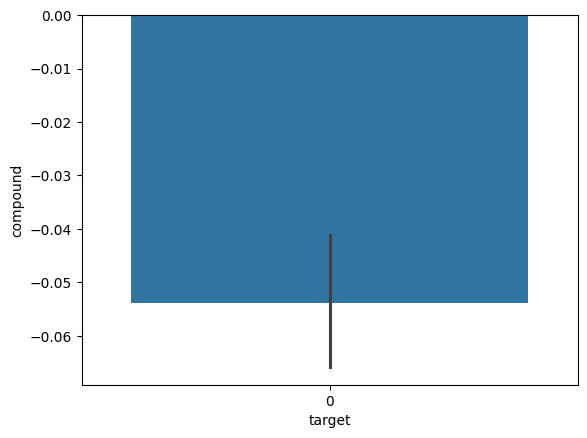

In [26]:
sns.barplot(data=vaders, x='target', y='compound', palette='tab10')

This graph shows that most of the texts from target 0 is negative

In [27]:
vaders['target'].value_counts()

target
0    5000
Name: count, dtype: int64

Text(0.5, 1.0, 'Negative Sentiment')

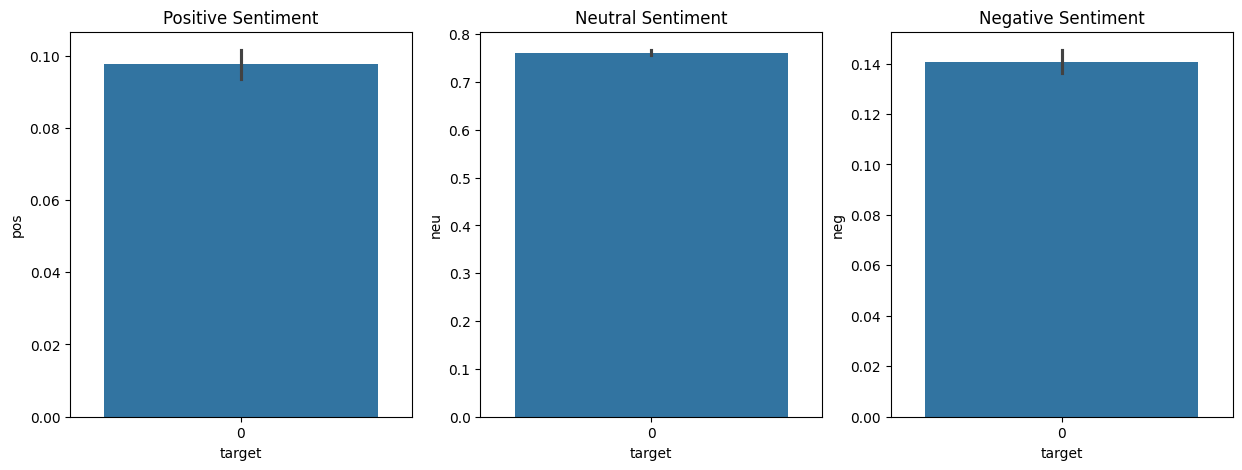

In [28]:
fig, axs = plt.subplots(1,3, figsize=(15,5))
sns.barplot(data=vaders, x='target', y='pos',ax=axs[0])
sns.barplot(data=vaders, x='target', y='neu',ax=axs[1])
sns.barplot(data=vaders, x='target', y='neg',ax=axs[2])

axs[0].set_title('Positive Sentiment')
axs[1].set_title('Neutral Sentiment')
axs[2].set_title('Negative Sentiment')

____
# Now Let's train the model

In [29]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax

c:\Users\Sagar Charma\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


The code "cardiffnlp/twitter-roberta-base-sentiment" demonstrates how to use a pre-trained sentiment analysis model using the Hugging Face Transformers library in Python.

In [30]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

c:\Users\Sagar Charma\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


In [31]:
print(texts)
sia.polarity_scores(texts)

@viennah yay! i'm happy for you with your job! but that also means less time for me and you... 


{'neg': 0.0, 'neu': 0.768, 'pos': 0.232, 'compound': 0.629}

### Running the Roberta Model

In [32]:
encoded_text = tokenizer(texts, return_tensors='pt')
output = model(**encoded_text)
output

SequenceClassifierOutput(loss=None, logits=tensor([[-2.1400, -0.2751,  3.0491]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

In [33]:
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores

scores_dict = {
    'roberta_neg': scores[0],
    'roberta_neu': scores[1],
    'roberta_pos': scores[2],
}

print(scores_dict)

{'roberta_neg': 0.0053544207, 'roberta_neu': 0.03456456, 'roberta_pos': 0.96008104}


Running Roberta on whole dataset

In [34]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg': scores[0],
        'roberta_neu': scores[1],
        'roberta_pos': scores[2],
    }
    return scores_dict

Lets import a progress bar

In [35]:
from tqdm import tqdm

In [36]:
results = {}
total = len(df)
with tqdm(total=total) as pbar:
    for i, row in df.iterrows():
        try:
            text = row['text']
            myid = row['id']
            vader_result = sia.polarity_scores(text)
            vader_result_rename = {}
            for key, value in vader_result.items():
                vader_result_rename[f'vader_{key}'] = value
            roberta_result = polarity_scores_roberta(text)
            final_result = {**vader_result, **roberta_result}
            results[myid] = final_result
        except RuntimeError:
            print(f"Broke for id {myid}")
        pbar.update(1)

100%|██████████| 5000/5000 [06:18<00:00, 13.22it/s]


In [37]:
final_result

{'neg': 0.479,
 'neu': 0.521,
 'pos': 0.0,
 'compound': -0.6808,
 'roberta_neg': 0.8969038,
 'roberta_neu': 0.08880294,
 'roberta_pos': 0.014293135}

Lets put the results in a data frame 

In [38]:
results_df = pd.DataFrame(results).T
# .T rotates the dataframe
results_df.reset_index(inplace=True)
results_df.rename(columns={'index': 'id'}, inplace=True)
results_df = pd.merge(results_df, df, on='id')

In [39]:
results_df.head()

,id,neg,neu,pos,compound,roberta_neg,roberta_neu,roberta_pos,target,data,flag,user,text
0,1467810369,0.134,0.773,0.093,-0.2023,0.810330,0.167725,0.021944,0,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - awww, t..."
1,1467810672,0.303,0.697,0.000,-0.7500,0.946732,0.048903,0.004366,0,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his facebook by ...
2,1467810917,0.000,0.833,0.167,0.4939,0.044705,0.624178,0.331118,0,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@kenichan i dived many times for the ball. man...
3,1467811184,0.321,0.500,0.179,-0.2500,0.813473,0.163007,0.023521,0,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,1467811193,0.241,0.759,0.000,-0.6597,0.945889,0.050011,0.004100,0,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


____
# We can also use pipeline for sentiment analysis

In [40]:
from transformers import pipeline

In [41]:
sent_pipeline = pipeline('sentiment-analysis')

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


lets take a random text as an example

In [42]:
new_df = column_name = ['target','id','data', 'flag','user', 'text']
new_df = pd.read_csv('training.1600000.processed.noemoticon.csv', names=column_name, encoding='ISO-8859-1')

In [43]:
print(sent_pipeline(new_df['text'][100]),new_df['text'][100])
print(sent_pipeline(new_df['text'][100000]),new_df['text'][100000])
print(sent_pipeline(new_df['text'][1500000]), new_df['text'][1500000])

[{'label': 'NEGATIVE', 'score': 0.9861804842948914}]  Body Of Missing Northern Calif. Girl Found: Police have found the remains of a missing Northern California girl .. http://tr.im/imji
[{'label': 'NEGATIVE', 'score': 0.999377429485321}] OMG, I just moisturised and my legs are BURNING me. It really hurts.  Go away.
[{'label': 'POSITIVE', 'score': 0.9993103742599487}] Chillin @ the beach with my girl brit-brit watchin the laker game n finally enjoyin this cali weather 
